In [8]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df_timeseries = pd.read_csv('data/df_timeseries.csv')
df_ict_access = pd.read_csv('data/ICT_usage.csv')

### Create a proper dataset for ICT access and cluster countries according to their average ICT access

In [4]:
display(df_ict_access)

,COU,Country,INDIC,Indicator,BRKD,Breakdowns,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2005,2005,PC,Percentage,0,Units,NaN,NaN,70.0000,D,Difference in methodology
1,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2006,2006,PC,Percentage,0,Units,NaN,NaN,73.0000,D,Difference in methodology
2,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2007,2007,PC,Percentage,0,Units,NaN,NaN,76.0000,D,Difference in methodology
3,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2008,2008,PC,Percentage,0,Units,NaN,NaN,78.0000,D,Difference in methodology
4,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2010,2010,PC,Percentage,0,Units,NaN,NaN,83.4200,D,Difference in methodology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945888,ITA,Italy,F4A,Individuals did not submit forms to public aut...,IND_QNT5,Individual living in a household with income i...,2022,2022,NaN,NaN,0,Units,NaN,NaN,49.7146,B,Break
945889,TUR,Türkiye,F4A,Individuals did not submit forms to public aut...,IND_QNT5,Individual living in a household with income i...,2022,2022,NaN,NaN,0,Units,NaN,NaN,54.4265,B,Break
945890,DNK,Denmark,F4I,Individuals did not submit forms to public aut...,Y16_24HI,Individuals aged 16-24 with a high level of ed...,2022,2022,NaN,NaN,0,Units,NaN,NaN,0.0000,B,Break
945891,FIN,Finland,F4I,Individuals did not submit forms to public aut...,Y16_24HI,Individuals aged 16-24 with a high level of ed...,2022,2022,NaN,NaN,0,Units,NaN,NaN,0.0000,B,Break


There are no data for Serbia

In [5]:
countries = ["Japan", "Germany", "France", "Italy", "Netherlands", "Sweden", "Italy", "Korea", "Finland", "Norway", "Denmark", "Türkiye"]
time = [2018, 2019, 2020]

df_ict_access_ = df_ict_access[(df_ict_access.Country.isin(countries)) & (df_ict_access.Time.isin(time)) &  (df_ict_access.Breakdowns.isin(["All (individuals aged 16-74)"]))]

# we are only interested in the columns 'Indicator' and its corresponding value (%age of people doing the thing stated in indicator)
df_ict_access_ = df_ict_access_[['Country', 'Time', 'Indicator', 'Value']].reset_index(drop = True).groupby(["Indicator", "Country"])["Value"].mean().reset_index()

# pivot the dataset to have indictors as features and each row should represent a country
df_ict_access_ = df_ict_access_.pivot(index='Country', columns='Indicator', values='Value').reset_index()

display(df_ict_access_)

Indicator,Country,Individuals did not submit forms to public authorities: another person did it on their behalf - last 12 m (%),Individuals did not submit forms to public authorities: electronic signature/ID/certificate issues - last 12 m (%),Individuals did not submit forms to public authorities: lack of skills or knowledge - last 12 m (%),Individuals did not submit forms to public authorities: no need at all - last 12 m (%),Individuals did not submit forms to public authorities: no such website service available - last 12 m (%),Individuals did not submit forms to public authorities: personal data protection and security concerns - last 12 m (%),Individuals having caught a virus or other computer infection with impacts - last 3 m (%),Individuals having experienced a financial loss from fraudulent payment - last 3 m (%),Individuals having experienced a financial loss from phishing/pharming - last 3 m (%),...,Individuals who have transferred files - last 12 m (%),Individuals who have used basic arithmetic formulas in a spreadsheet - last 12 m (%),Individuals who have used software for electronic presentations (slides) - last 12 m (%),Individuals who have used spreadsheet advanced functions - last 12 m (%),Individuals who have used word processing software - last 12 m (%),Individuals who have written computer code - last 12 m (%),Individuals who managed access to personal data on the internet: read privacy policy statements before providing personal data,Individuals who managed access to their personal information on the Internet: limit access to their profile or content on social networking sites - last 12 m (%),Individuals who managed access to their personal information on the Internet: refuse allowing the use of personal information for advertising purposes - last 12 m (%),Individuals who managed access to their personal information on the Internet: restrict access to their geographical location - last 12 m (%)
0,Denmark,2.635433,0.5507,1.416467,18.228600,0.545167,0.780533,1.8010,5.6319,2.6275,...,61.038700,NaN,48.787900,33.6518,56.6225,14.29940,36.2914,48.8464,63.4918,62.2170
1,Finland,1.053700,0.4150,1.850067,20.711267,0.577633,0.592200,2.3801,1.7009,0.9368,...,66.125400,NaN,49.694300,33.7759,70.8274,9.85710,51.3691,56.7144,69.6703,69.4808
2,France,4.257500,NaN,5.572850,7.017450,0.602200,4.459950,2.8091,5.4020,1.5003,...,59.761000,NaN,35.125500,26.5214,54.0294,6.15770,NaN,NaN,NaN,NaN
3,Germany,4.457400,NaN,3.779933,49.861100,6.761133,6.802233,1.1222,0.9758,0.6284,...,65.647200,NaN,39.578200,33.2757,63.0665,5.94720,48.5005,40.0610,62.7896,54.8481
4,Italy,NaN,NaN,NaN,NaN,NaN,NaN,1.7752,1.8856,1.0389,...,36.116500,NaN,29.083700,21.4302,39.9203,5.84760,35.4762,24.3557,37.9534,31.3804
5,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.481389,47.341541,40.394773,NaN,NaN,7.21933,NaN,NaN,NaN,NaN
7,Netherlands,5.573800,0.1087,1.180967,23.854633,0.700167,0.976367,1.4825,2.1763,0.8004,...,68.350500,NaN,46.389500,36.1664,76.4952,9.54500,44.5076,62.6840,72.6136,74.9929
8,Norway,0.873633,0.5101,0.981333,20.947867,0.333967,0.446367,2.0550,4.3620,2.0873,...,66.496400,NaN,50.147300,30.2279,80.0602,11.66350,42.0789,36.8177,47.0046,56.8775
9,Sweden,1.173950,NaN,1.521300,13.195100,0.576333,0.560700,2.2794,3.2773,2.4690,...,52.866600,NaN,46.843100,29.0135,67.2962,11.89730,34.8613,40.3581,43.6355,57.8170


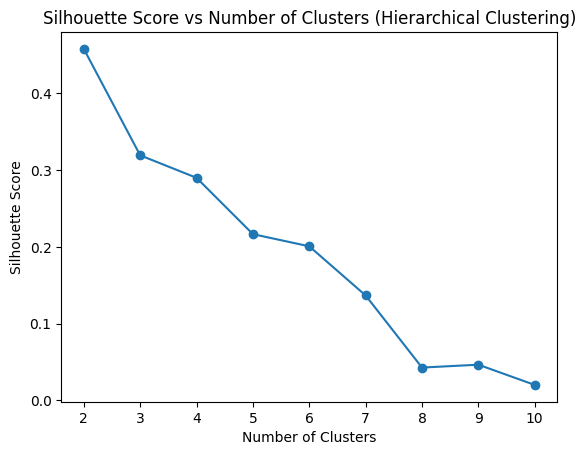

In [6]:
countries = df_ict_access_['Country']
features = df_ict_access_.drop('Country', axis=1)

imputer = SimpleImputer(strategy='median') # replace NaN with median value of the column 
features_imputed = imputer.fit_transform(features)

num_clusters_range = range(2, 11)
silhouette_scores = []

for num_clusters in num_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agglomerative.fit_predict(features_imputed)
    silhouette_avg = silhouette_score(features_imputed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (Hierarchical Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [9]:
best_num_clusters = 3

kmeans = KMeans(n_clusters=best_num_clusters, random_state=42, n_init =10)
df_ict_access_['Cluster'] = kmeans.fit_predict(features_imputed)

df_ict_access_['Country'] = countries

In [10]:
print(df_ict_access_[['Country', 'Cluster']])

Indicator      Country  Cluster
0              Denmark        0
1              Finland        0
2               France        2
3              Germany        2
4                Italy        1
5                Japan        2
6                Korea        2
7          Netherlands        0
8               Norway        0
9               Sweden        0
10             Türkiye        1


Cluster 0: Denmark, Finland, Netherlands, Norway, Sweden

Cluster 1: Italy, Turkey

Cluster 2: France, Germany, Japan, Korea

### Cluster countries in groups with similar cultural interests

We will be able to see if the clusters retrieved as similar to the one retrieved just before

In [11]:
display(df_timeseries)

,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
0,1716611.0,11.517633,ja,2018-01-01,Culture.Biography.Biography*,0.219287,0.188152,54,46,95,92,88,42
1,1778375.0,11.932039,ja,2018-01-02,Culture.Biography.Biography*,0.203025,0.188145,54,46,95,92,88,42
2,2008370.0,13.475195,ja,2018-01-03,Culture.Biography.Biography*,0.200914,0.188141,54,46,95,92,88,42
3,2212806.0,14.846862,ja,2018-01-04,Culture.Biography.Biography*,0.184755,0.188139,54,46,95,92,88,42
4,2371514.0,15.911716,ja,2018-01-05,Culture.Biography.Biography*,0.186047,0.188140,54,46,95,92,88,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593665,15144565.0,6.290878,de.m,2020-07-27,ALL,1.000000,NaN,35,67,66,65,83,40
1593666,14183699.0,5.891745,de.m,2020-07-28,ALL,1.000000,NaN,35,67,66,65,83,40
1593667,13986935.0,5.810012,de.m,2020-07-29,ALL,1.000000,NaN,35,67,66,65,83,40
1593668,13483274.0,5.600797,de.m,2020-07-30,ALL,1.000000,NaN,35,67,66,65,83,40


In [12]:
# sum up the number of pageviews over the whole period for each topic
df_timeseries_ = df_timeseries[df_timeseries.topic != 'ALL'].groupby(["language", "topic"])["pageviews_per_page"].sum().reset_index()

# pivot the dataset to have topics as features and each row should represent a language
df_timeseries_ = df_timeseries_.pivot(index='language', columns='topic', values='pageviews_per_page').reset_index()

df_timeseries_['total_pageviews'] = df_timeseries_.drop('language', axis=1).sum(axis=1)

display(df_timeseries_) 

topic,language,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology,total_pageviews
0,ca,774.808922,881.729281,1134.707962,879.019264,1346.115658,1185.342757,1575.391709,799.741952,302.367934,...,863.337320,783.232084,1194.099622,955.351823,1466.006086,1458.254893,748.141084,492.842323,1252.625077,4.697771e+04
1,ca.m,407.506271,589.289498,1367.832172,375.247545,752.562947,693.074820,831.487634,710.765507,460.372950,...,449.919845,414.227553,368.623244,445.529812,1128.168746,720.194057,438.508377,255.910570,456.497708,2.894484e+04
2,da,1104.038578,1631.526754,2604.245426,1974.827188,2917.094551,2632.031436,2554.575092,1348.207692,1423.992046,...,2784.668101,1651.887497,1813.894879,4463.157277,3436.191356,4535.779817,2558.568198,1309.758133,2663.286436,1.179873e+05
3,da.m,2266.904972,3664.427632,5246.081214,1548.121724,2391.387166,3205.192106,3269.276190,3012.394872,3336.619853,...,2208.222276,2154.336675,780.452830,2146.618545,4132.126677,2071.941716,2410.497441,1306.413859,1970.636845,1.427282e+05
4,de,5775.258675,8046.654382,21926.591758,21272.383909,10832.270386,11604.012958,12589.219412,19416.254954,13148.845537,...,8404.118589,17248.905689,8762.325459,24256.676747,27290.381476,20371.427510,16212.255959,5886.505210,26327.732271,7.352165e+05
5,de.m,9485.273658,15756.219052,43954.000606,20841.126162,10566.442887,17018.109682,17838.895243,37094.279172,23433.377787,...,8242.170865,18221.157798,4750.493438,12446.139775,40984.370532,13545.722973,16004.058681,6095.861850,17898.039865,8.846088e+05
6,fi,1000.936264,1092.634723,3863.590133,1904.861026,2335.287303,1833.259360,1854.781405,1790.008601,1466.953064,...,2499.969862,2062.064894,1676.067368,3990.189601,4438.695380,4541.106722,2491.387874,1215.661782,3255.950982,1.138512e+05
7,fi.m,2262.881084,3013.527546,8944.766287,2287.841301,3136.952603,3490.240012,3368.280735,4639.391454,3944.242220,...,3417.939205,3386.197546,1172.292632,2774.209524,9725.799512,4521.985789,3953.989523,1888.826923,3392.275815,1.856965e+05
8,fr,4857.185069,6402.120230,11949.053212,8616.847829,7726.271128,10092.885698,9161.573007,10016.096885,7938.562822,...,6760.513507,7904.934064,6301.405746,13082.077024,16770.176499,14398.755656,8185.425847,3920.837431,16009.499609,4.614163e+05
9,fr.m,9328.392607,14070.531539,27295.282762,8212.016142,9641.941872,14915.143747,12828.305778,18480.696668,12547.224966,...,7872.597556,10273.749964,4391.089763,10024.399310,31071.465123,13663.847894,9898.379661,4590.377314,12144.734146,6.535353e+05


In [13]:
nan_check = df_timeseries_.isna().any()

print("Columns with NaN values:")
print(nan_check[nan_check].index.tolist())

Columns with NaN values:
[]


In [14]:
# Merge mobile and pc rows 
df_timeseries_['lang_prefix'] = df_timeseries_['language'].str[:2]

df_timeseries_ = df_timeseries_.groupby(['lang_prefix'], as_index=False).agg({
    **{topic: 'sum' for topic in df_timeseries_.columns if topic not in ['lang_prefix']},
})

df_timeseries_.drop('language', axis=1, inplace=True)

# Normalize by dividing each cell by the total number of pageviews for this language (all topics included)
for topic in df_timeseries_.columns[1:]: 
    df_timeseries_[topic] = df_timeseries_[topic] / df_timeseries_['total_pageviews']

df_timeseries_ = df_timeseries_.drop('total_pageviews', axis=1)

display(df_timeseries_)

topic,lang_prefix,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Computing,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology
0,ca,0.015573,0.019375,0.032962,0.016520,0.027642,0.024741,0.031702,0.019895,0.010046,...,0.017121,0.017297,0.015772,0.020583,0.018451,0.034169,0.028693,0.015630,0.009862,0.022511
1,da,0.012930,0.020313,0.030111,0.013513,0.020361,0.022389,0.022338,0.016726,0.018260,...,0.013995,0.019151,0.014599,0.009951,0.025352,0.029029,0.025345,0.019059,0.010035,0.017774
2,de,0.009421,0.014695,0.040671,0.025999,0.013211,0.017670,0.018785,0.034887,0.022584,...,0.020705,0.010277,0.021897,0.008342,0.022659,0.042149,0.020939,0.019889,0.007397,0.027303
3,fi,0.010896,0.013708,0.042759,0.013997,0.018268,0.017772,0.017436,0.021464,0.018065,...,0.015487,0.019756,0.018188,0.009509,0.022582,0.047286,0.030256,0.021517,0.010364,0.022194
4,fr,0.012723,0.018362,0.035198,0.015094,0.015578,0.022430,0.019723,0.025559,0.018374,...,0.019612,0.013124,0.016304,0.009590,0.020724,0.042909,0.025169,0.016219,0.007634,0.025252
5,it,0.013365,0.017223,0.039184,0.014807,0.018096,0.024554,0.021139,0.031612,0.023294,...,0.014718,0.009787,0.016497,0.011548,0.020306,0.044058,0.027534,0.017375,0.006178,0.021203
6,ja,0.017548,0.022085,0.027064,0.025514,0.012914,0.051385,0.016339,0.019605,0.019686,...,0.011354,0.011293,0.016225,0.010393,0.010422,0.029098,0.013865,0.014342,0.004807,0.016124
7,ko,0.014683,0.015394,0.023019,0.023410,0.020966,0.015361,0.016724,0.008300,0.009682,...,0.025192,0.013379,0.018476,0.028085,0.025145,0.040948,0.027777,0.020564,0.008832,0.028672
8,nl,0.013558,0.017458,0.045754,0.015379,0.020087,0.019559,0.018856,0.018986,0.014853,...,0.018455,0.012257,0.019120,0.012968,0.020710,0.051696,0.027818,0.009925,0.009264,0.025412
9,no,0.010594,0.011629,0.040249,0.016985,0.020549,0.021349,0.021748,0.020857,0.014527,...,0.011572,0.020607,0.013793,0.013513,0.025830,0.040204,0.027320,0.017851,0.008388,0.019097


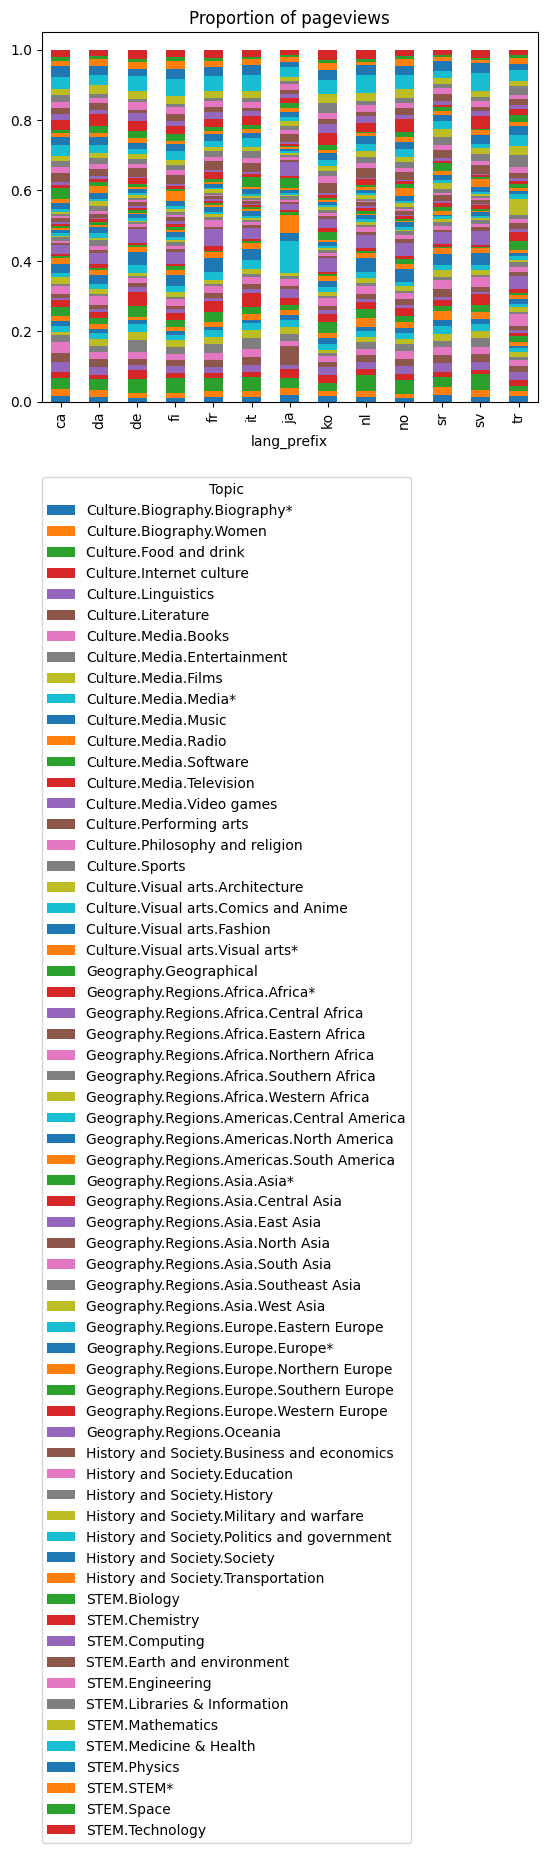

In [15]:
df_timeseries_.plot.bar(x='lang_prefix', stacked=True, title='Proportion of pageviews')
plt.legend(title='Topic', loc=(0,-3.9))

In [16]:
topic_mapping = {
    'STEM': ['STEM.Biology', 'STEM.Chemistry', 'STEM.Computing', 'STEM.Earth and environment',
             'STEM.Engineering', 'STEM.Libraries & Information', 'STEM.Mathematics',
             'STEM.Medicine & Health', 'STEM.Physics', 'STEM.STEM*', 'STEM.Space', 'STEM.Technology'],
    'History and Society': ['History and Society.Business and economics', 'History and Society.Education',
                            'History and Society.History', 'History and Society.Military and warfare',
                            'History and Society.Politics and government', 'History and Society.Society',
                            'History and Society.Transportation'],
    'Geography': ['Geography.Geographical', 'Geography.Regions.Africa.Africa*',
                  'Geography.Regions.Africa.Central Africa', 'Geography.Regions.Africa.Eastern Africa',
                  'Geography.Regions.Africa.Northern Africa', 'Geography.Regions.Africa.Southern Africa',
                  'Geography.Regions.Africa.Western Africa', 'Geography.Regions.Americas.Central America',
                  'Geography.Regions.Americas.North America', 'Geography.Regions.Americas.South America',
                  'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.Central Asia',
                  'Geography.Regions.Asia.East Asia', 'Geography.Regions.Asia.North Asia',
                  'Geography.Regions.Asia.South Asia', 'Geography.Regions.Asia.Southeast Asia',
                  'Geography.Regions.Asia.West Asia', 'Geography.Regions.Europe.Eastern Europe',
                  'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Northern Europe',
                  'Geography.Regions.Europe.Southern Europe', 'Geography.Regions.Europe.Western Europe',
                  'Geography.Regions.Oceania'],
    'Culture': ['Culture.Biography.Biography*', 'Culture.Biography.Women', 'Culture.Food and drink',
                'Culture.Internet culture', 'Culture.Linguistics', 'Culture.Literature', 'Culture.Media.Books',
                'Culture.Media.Entertainment', 'Culture.Media.Films', 'Culture.Media.Media*', 'Culture.Media.Music',
                'Culture.Media.Radio', 'Culture.Media.Software', 'Culture.Media.Television', 'Culture.Media.Video games',
                'Culture.Performing arts', 'Culture.Philosophy and religion', 'Culture.Sports',
                'Culture.Visual arts.Architecture', 'Culture.Visual arts.Comics and Anime', 'Culture.Visual arts.Fashion',
                'Culture.Visual arts.Visual arts*']
}

mapped_timeseries_df = pd.DataFrame(columns=['STEM', 'History and Society', 'Geography', 'Culture'])
for category, sub_topics in topic_mapping.items():
    mapped_timeseries_df[category] = df_timeseries_[sub_topics].sum(axis=1)
mapped_timeseries_df['lang_prefix'] = df_timeseries_['lang_prefix']

display(mapped_timeseries_df)

,STEM,History and Society,Geography,Culture,lang_prefix
0,0.238392,0.137949,0.214801,0.408857,ca
1,0.237404,0.122556,0.267162,0.372877,da
2,0.249973,0.110965,0.201053,0.438009,de
3,0.259109,0.122571,0.244597,0.373723,fi
4,0.230959,0.111315,0.234010,0.423716,fr
5,0.226206,0.122962,0.199191,0.451641,it
6,0.166489,0.095050,0.207122,0.531339,ja
7,0.284531,0.122870,0.236235,0.356364,ko
8,0.237365,0.127099,0.213069,0.422467,nl
9,0.249506,0.119759,0.239271,0.391465,no


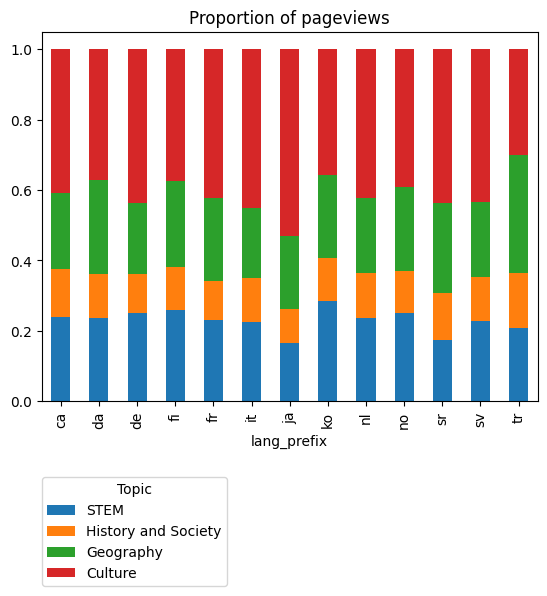

In [17]:
mapped_timeseries_df.plot.bar(x='lang_prefix', stacked=True, title='Proportion of pageviews')
plt.legend(title='Topic', loc=(0,-0.5))

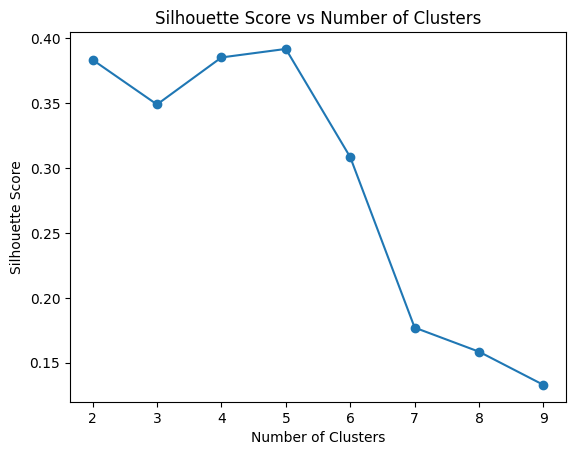

In [18]:
countries = mapped_timeseries_df['lang_prefix']
features = mapped_timeseries_df.drop('lang_prefix', axis=1)

imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

num_clusters_range = range(2, 10)
silhouette_scores = []

for num_clusters in num_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agglomerative.fit_predict(features_imputed)
    silhouette_avg = silhouette_score(features_imputed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [19]:
best_num_clusters = 5

kmeans = KMeans(n_clusters=best_num_clusters, random_state=42, n_init =10)
mapped_timeseries_df['Cluster'] = kmeans.fit_predict(features_imputed)

mapped_timeseries_df['lang_prefix'] = countries

In [20]:
print(mapped_timeseries_df[['lang_prefix', 'Cluster']])

   lang_prefix  Cluster
0           ca        4
1           da        2
2           de        4
3           fi        2
4           fr        4
5           it        4
6           ja        3
7           ko        2
8           nl        4
9           no        2
10          sr        0
11          sv        4
12          tr        1


Cluster 0: Serbia (we didn't have data concerning ICT usage for Serbia) 

Cluster 1: Turkey

Cluster 2: Denmark, Finland, Korea, Norway

CLuster 3: Japan

Cluster 4: Catalan, Germany, France, Italy, Netherlands, Sweden

I also tried before to cluster before mapping columns to more general categories and the best Silhouette score was obtained with only one cluster -> so it tried to reduce the number of features to reduce the chance of overfitting 

### Summary 

#### Cluster ICT 

| Cluster | Countries                              |
|---------|----------------------------------------|
| 0       | Denmark, Finland, Netherlands, Norway, Sweden |
| 1       | Italy, Turkey                           |
| 2       | France, Germany, Japan, Korea           |

#### Clusters timeseries

| Cluster | Countries                                      |
|---------|------------------------------------------------|
| 0       | Serbia (no data on ICT usage)                  |
| 1       | Turkey                                         |
| 2       | Denmark, Finland, Korea, Norway                |
| 3       | Japan                                          |
| 4       | Catalan, Germany, France, Italy, Netherlands, Sweden |